# Pruebas: Generación de un modelo con árboles de decisión

Tras realizar un filtrado de datos, se procede a generar un modelo de predicción.

La trayectoria se compone de datos cinemáticos y un timestamp.
En este collaborate se van a proponer 3 pasos:



1.   Preprocesado de puntos

La idea principal es transformar los puntos (estáticos) y sus velocidades a unas instancias (dinámicas) que el algoritmo pueda entender bien. Para ello se calcularán las diferencias de posición, velocidad y aceleración entre puntos "adyacentes" para obtener los incrementos de los atributos.  

2.   Unión de las trayectorias en un único dataframe

Para generar el modelo sobre el conjunto completo. Se guardará en un csv (o en varios, uno por modelo)

3. Generación de modelos

4. Análisis de resultados


--------

Modelos en el dataset (clases):



*   Quadrotor  10016
*   vtol 1040
*   fixed wing 1030
*   plane 2100
*   octorotor 12001
*   hexarotor 6100



In [ ]:
#IMPORTS

import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from matplotlib import pyplot as plt
from sklearn import tree
from cmath import nan
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as mp

from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [ ]:
#PATHS
#folder="Hexarotor"
path=r"/content/drive/MyDrive/TFG Celia/Código/Datos_limpios/"
#mypath= r"/content/drive/MyDrive/TFG Celia/Código/Datos_limpios/"+folder+"/"
outputPath = r"/content/drive/MyDrive/TFG Celia/Código/Datos_limpios/Output_test"
otherPath = r"/content/drive/MyDrive/TFG/others/"
instance = r'ce97fb64-2d05-4356-a27c-c57eb30ee11d.csv'

In [ ]:
big_csv = pd.read_csv(outputPath+'/output4.csv',sep=',')

In [ ]:
big_csv

,Unnamed: 0,drone_model,x,y,z,vx,vy,vz,ax,ay,az,timestamp
0,0,10016.0,-1.068831e-02,5.330130e-02,0.144103,0.000673,0.000678,-0.002896,-0.026293,-0.031377,0.022241,5672000.0
1,1,10016.0,1.068831e-02,-5.330130e-02,-0.144103,-0.000673,-0.000678,0.002896,0.026293,0.031377,-0.022241,28000.0
2,2,10016.0,-1.074344e-02,5.317444e-02,0.142359,0.000625,-0.000911,-0.003248,-0.022707,-0.054445,-0.031708,72000.0
3,3,10016.0,1.074344e-02,-5.317444e-02,-0.142359,-0.000625,0.000911,0.003248,0.022707,0.054445,0.031708,24000.0
4,4,10016.0,-1.043633e-02,5.280039e-02,0.141321,0.001483,-0.000984,-0.002819,-0.019002,0.032026,0.015463,64000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
252373,252800,1040.0,-1.172033e+07,8.522139e+06,-31.381478,-0.022586,-0.011481,-0.149459,-0.000127,0.012938,-0.027059,116000.0
252374,252801,1040.0,1.172033e+07,-8.522139e+06,31.382285,0.016300,0.007282,0.145047,0.059727,0.000091,0.116239,96000.0
252375,252802,1040.0,-1.172033e+07,8.522139e+06,-31.382285,-0.016300,-0.007282,-0.145047,-0.059727,-0.000091,-0.116239,4000.0
252376,252803,1040.0,1.172033e+07,-8.522139e+06,31.390781,0.010793,0.009021,0.144670,-0.021075,-0.000738,0.079363,284000.0


In [ ]:
#Separación del dataset en train y test, 80 y 20%

X=big_csv.drop(columns=['drone_model','Unnamed: 0'])
y= big_csv['drone_model']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

X_train.shape

(201902, 10)

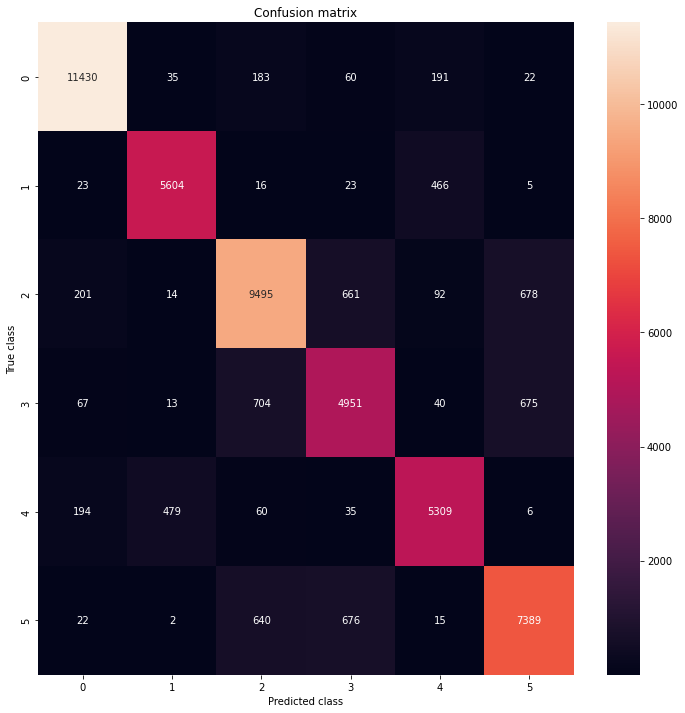

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)
#plt.title("Confusion matrix")
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')

plt.show()

#Classes: quadrotor - vtol - fixed wing - plane - octorotor - hexarotor

In [ ]:
#DECISION TREE MODEL 

dt = DecisionTreeClassifier(random_state=0)

dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)
y_pred_proba = dt.predict_proba(X_test)#[:, 1]

#ANALISIS DE RESULTADOS

confmat = metrics.confusion_matrix(y_test, y_pred)
acc = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average='micro')
recall = metrics.recall_score(y_test, y_pred, average='micro')
f1 = metrics.f1_score(y_test, y_pred, average='micro')
#auroc = metrics.roc_auc_score(y_test, y_pred_proba, multi_class='ovr')


print(f"Confusion matrix:\n{confmat}\n" +
      f"Accuracy score: {acc:.5f}\n" +
      f"Recall: {recall:.5f}\n" +
      f"F1 score: {f1:.5f}\n") #+
      #f"AUROC: {auroc:.5f}\n")

Confusion matrix:
[[11430    35   183    60   191    22]
 [   23  5604    16    23   466     5]
 [  201    14  9495   661    92   678]
 [   67    13   704  4951    40   675]
 [  194   479    60    35  5309     6]
 [   22     2   640   676    15  7389]]
Accuracy score: 0.87523
Recall: 0.87523
F1 score: 0.87523



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


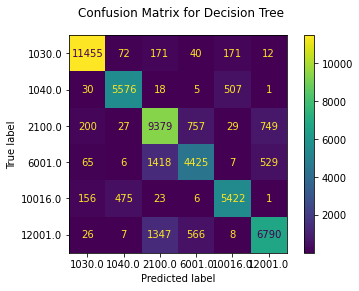

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix

fig = plot_confusion_matrix(dt_kn, X_test, y_test, display_labels=dt.classes_)
fig.figure_.suptitle("Confusion Matrix for Decision Tree")
plt.show()


#Classes:  fixed wing - vtol - plane - hexarotor - quadrotor - octorotor

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      1030.0       0.96      0.96      0.96     11921
      1040.0       0.91      0.91      0.91      6137
      2100.0       0.86      0.85      0.85     11141
      6001.0       0.77      0.77      0.77      6450
     10016.0       0.87      0.87      0.87      6083
     12001.0       0.84      0.85      0.84      8744

    accuracy                           0.88     50476
   macro avg       0.87      0.87      0.87     50476
weighted avg       0.88      0.88      0.88     50476



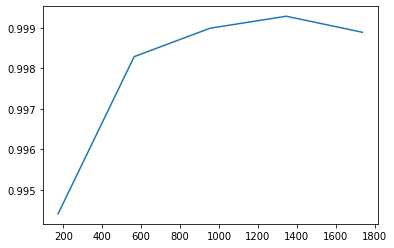

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from matplotlib import pyplot as plt
import numpy as np

X, y = load_digits(return_X_y=True)
estimator = SVC(gamma=0.001)

train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(estimator, X, y, cv=30,return_times=True)

plt.plot(train_sizes,np.mean(train_scores,axis=1))

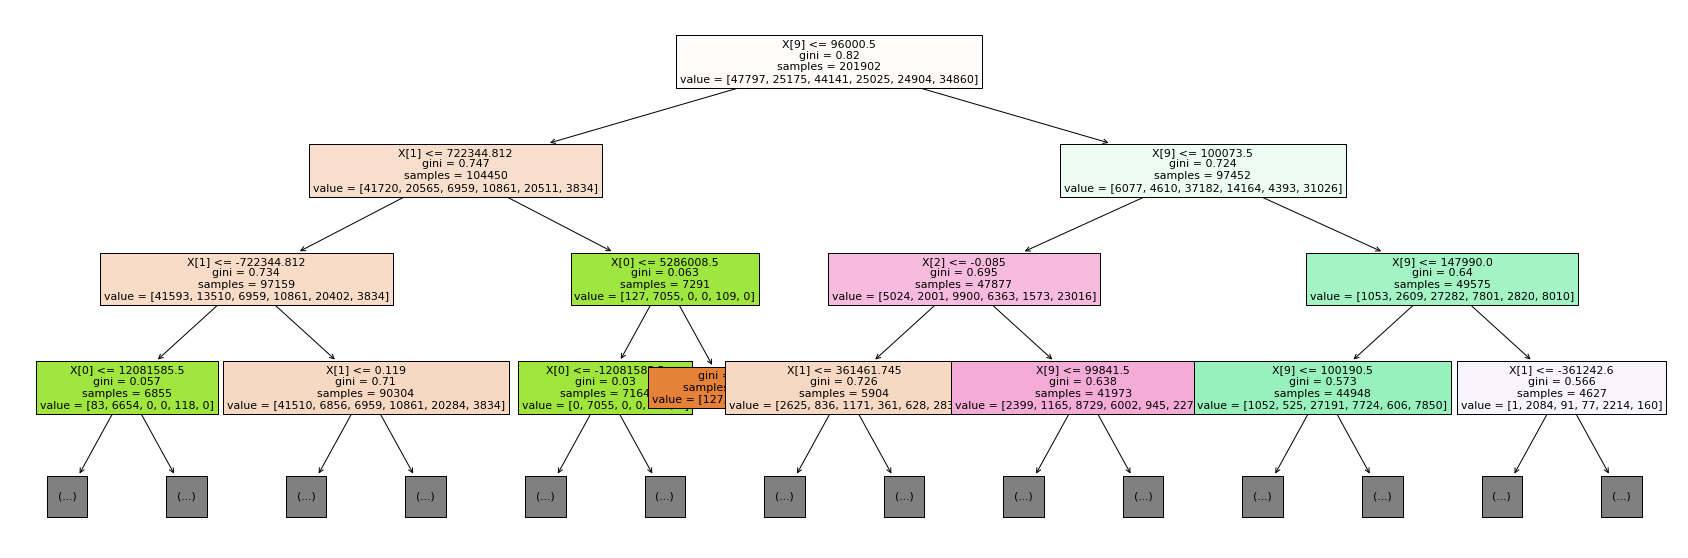

In [ ]:
from matplotlib import pyplot as plt
from sklearn import tree
#class_names=['quadrotor','vtol','fixed wing','plane','octorotor','hexarotor']
fig = plt.figure(figsize=(30,10)) #Para cambiar el tamaño del árbol
tree=tree.plot_tree(dt, max_depth=3, feature_names=['x','y','z','vx','vy','vz','ax','ay','az']
               , fontsize= 11, filled=True )

In [ ]:
#K VECINOS PRÓXIMOS

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

dt_kn = KNeighborsClassifier()

dt_kn.fit(X_train, y_train)

y_pred = dt_kn.predict(X_test)
#y_pred_proba = dt.predict_proba(X_test)[:, 1]

confmat = metrics.confusion_matrix(y_test, y_pred)
acc = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average='micro')
recall = metrics.recall_score(y_test, y_pred, average='micro')
f1 = metrics.f1_score(y_test, y_pred, average='micro')
#auroc = metrics.roc_auc_score(y_test, y_pred_proba, multi_class='ovr')


print(f"Confusion matrix:\n{confmat}\n" +
      f"Accuracy score: {acc:.5f}\n" +
      f"Recall: {recall:.5f}\n" +
      f"F1 score: {f1:.5f}\n") #+
      #f"AUROC: {auroc:.5f}\n")
      


Confusion matrix:
[[11455    72   171    40   171    12]
 [   30  5576    18     5   507     1]
 [  200    27  9379   757    29   749]
 [   65     6  1418  4425     7   529]
 [  156   475    23     6  5422     1]
 [   26     7  1347   566     8  6790]]
Accuracy score: 0.85282
Recall: 0.85282
F1 score: 0.85282



In [ ]:
from sklearn import svm

#svm_model = svm.SVC()
#svm_model.fit(X_train, y_train)

clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
clf.score(X_test, y_test)
#lin_clf = svm.LinearSVC()
#lin_clf.fit(X_train, y_train)

#ANALISIS DE RESULTADOS

confmat = metrics.confusion_matrix(y_test, y_pred)
acc = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average='micro')
recall = metrics.recall_score(y_test, y_pred, average='micro')
f1 = metrics.f1_score(y_test, y_pred, average='micro')
#auroc = metrics.roc_auc_score(y_test, y_pred_proba, multi_class='ovr')


print(f"Confusion matrix:\n{confmat}\n" +
      f"Accuracy score: {acc:.5f}\n" +
      f"Recall: {recall:.5f}\n" +
      f"F1 score: {f1:.5f}\n") #+
      #f"AUROC: {auroc:.5f}\n")

In [ ]:
clf = MLPClassifier( alpha=1e-5,hidden_layer_sizes=(100,5), random_state=1, max_iter=1000)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)#[:, 1]

y_pred

#ANALISIS DE RESULTADOS

confmat = metrics.confusion_matrix(y_test, y_pred)
acc = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average='micro')
recall = metrics.recall_score(y_test, y_pred, average='micro')
f1 = metrics.f1_score(y_test, y_pred, average='micro')
#auroc = metrics.roc_auc_score(y_test, y_pred_proba, multi_class='ovr')


print(f"Confusion matrix:\n{confmat}\n" +
      f"Accuracy score: {acc:.5f}\n" +
      f"Recall: {recall:.5f}\n" +
      f"F1 score: {f1:.5f}\n") #+
      #f"AUROC: {auroc:.5f}\n")

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Confusion matrix:
[[   52     0     0     0 11898     0]
 [    0     0     0     0 13339     0]
 [    0     0     0     0 11260     0]
 [    0     0     0     0  6357     0]
 [    0     0     0     0 15067     0]
 [    0     0     0     0  8574     0]]
Accuracy score: 0.22719
Recall: 0.22719
F1 score: 0.22719



In [ ]:

from sklearn.preprocessing import StandardScaler


trainX, testX, trainY, testY = train_test_split(X, y, test_size = 0.2)

sc=StandardScaler()

scaler = sc.fit(trainX)
trainX_scaled = scaler.transform(trainX)
testX_scaled = scaler.transform(testX)

mlp_clf = MLPClassifier(hidden_layer_sizes=(150,100,50),
                        max_iter = 300,activation = 'relu',
                        solver = 'adam')

In [ ]:
mlp_clf.fit(trainX_scaled, trainY)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=300)

In [ ]:
y_pred = mlp_clf.predict(testX_scaled)

In [ ]:
from sklearn.metrics import accuracy_score

print('Accuracy: {:.2f}'.format(accuracy_score(testY, y_pred)))

Accuracy: 0.82


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


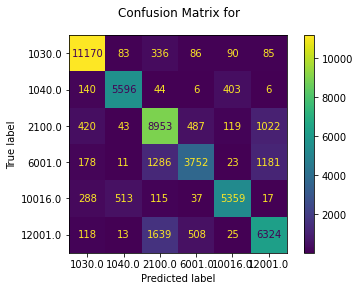

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix

fig = plot_confusion_matrix(mlp_clf, testX_scaled, testY, display_labels=mlp_clf.classes_)
fig.figure_.suptitle("Confusion Matrix for ")
plt.show()

In [ ]:
print(classification_report(testY, y_pred))

In [ ]:
#Porcentaje de datos de cada clase

big_csv['drone_model'].value_counts(normalize=True)*100

#Clases: quadrotor - vtol - fixed wing - plane - octorotor - hexarotor

10016.0    22.491343
1040.0     20.209870
1030.0     17.997350
2100.0     16.664659
12001.0    13.144139
6001.0      9.492638
Name: drone_model, dtype: float64

In [ ]:
#Para probar un ejemplo con 2 modelos

for f in listdir(path): 
  if isfile(join(path, f)):
    df = pd.DataFrame() #CLEAN DF
    df = pd.read_csv(mypath+instance,sep=',')
    df_aux= pd.read_csv('/content/drive/MyDrive/TFG Celia/Código/Datos_limpios/Plane/022eb50b-d1eb-44a7-9b2b-04d54e359e42.csv',sep=',')

    df=pd.concat([df,df_aux])
    df_model=df['drone_model']

In [ ]:
#Dataframe pequeño de ejemplo con 2 trayectorias para probar el modelo

df = pd.DataFrame() #CLEAN DF
df = pd.read_csv(mypath+instance,sep=',')
df_aux= pd.read_csv('/content/drive/MyDrive/TFG Celia/Código/Datos_limpios/Plane/022eb50b-d1eb-44a7-9b2b-04d54e359e42.csv',sep=',')

df=pd.concat([df,df_aux],ignore_index=True)
df_model=df['drone_model']


In [ ]:
#onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))] #FILE NAMES
new_data=pd.DataFrame()

for i in range(len(df)):
  for column in df.columns[0:-1]:
    if i<len(df)-1 and column!='drone_model':
      new_data.loc[i, column] = df.loc[i+1,column]-df.loc[i,column]
    #new_data = pd.concat([new_data,new_df])
new_data['drone_model']=df_model
new_data.to_csv(outputPath+'/output.csv')   

In [ ]:
#GOES THROUGH EVERY FILE AND DIRECTORY
#TRANSFORMS DATA TO INTERVALS
#SAVES EVERYTHING IN A CSV (output.csv)

df = pd.DataFrame() #CLEAN DF
big_csv= pd.DataFrame()
df_model=pd.DataFrame()

for dir in listdir(path):
  if dir!='Output_test' and dir!='bad':
    print(path+dir)
    for f in listdir(path+dir): 
      if isfile(join(path+dir, f)):
        print(f)
        df = pd.read_csv(path+dir+'/'+f,sep=',')
        df_model=pd.concat([df_model,df['drone_model']],ignore_index=True)

        new_data=pd.DataFrame()

        for i in range(len(df)):
          for column in df.columns[0:-1]:
            if i<len(df)-1 and column!='drone_model':
              new_data.loc[i, column] = df.loc[i+1,column]-df.loc[i,column]

        #new_data['drone_model']=df_model
        #new_data.to_csv(outputPath+'/output.csv')   
        big_csv=pd.concat([big_csv,new_data],ignore_index=True)

big_csv['drone_model']=df_model
big_csv.to_csv(outputPath+'/output3.csv')   
        

/content/drive/MyDrive/TFG Celia/Código/Datos_limpios/Quadrotor
004199e3-9cfa-4f1e-93c9-175f7e92e514.csv
00f9ba00-1ceb-4657-8b0b-7b5140da6b0f.csv
01f043e0-8317-49c8-badb-425f6dd94fa0.csv
02bbabd0-a34e-45f1-ae59-e0dca358ab86.csv
0037bf03-a798-4207-b01a-605315c17490.csv
0039e8c9-883d-48a2-aa7b-b80545e45a61.csv
01c15f92-c8c9-4276-bef8-e6c3dbe6e882.csv
02b7dde8-39c4-4974-a8e7-d8bf71d0170b.csv
0363491b-1698-450d-ba56-cf0e9388abbf.csv
037aadba-d7fc-40f1-b37a-953bb8f7b4dc.csv
03a0645d-5129-40cf-a07f-65ecb2341692.csv
03df3989-d395-44c7-beef-89574057863c.csv
04715194-e5ef-4acf-9dca-88c57372d59e.csv
049b983e-71a4-40d4-9d44-c2f167965fed.csv
04fb7339-d99f-4343-a04e-eb233c34f1a2.csv
0511f7b4-673e-47a3-aa3c-7da680ada749.csv
051936d4-2162-4bad-bbd4-78e94f3bf904.csv
0568034e-6c34-46f1-a0bc-f5a810596cf1.csv
0597edbc-e67d-4dac-b0e8-747b4feefecf.csv
0618d85d-8310-4246-aff8-939bb7a59287.csv
06577bda-5ab0-42ab-887f-74c10e20ee9a.csv
06c6ab8d-832e-4c2c-a133-10bc0edce346.csv
06e6e5c0-ed66-42b7-828e-ee9c2da50